In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
import json
import os
import matplotlib as plt

In [2]:

# print('xtxtxt')
# def load_raw_data(df, sampling_rate, path):
#     if sampling_rate == 100:
#         data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
#     else:
#         data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
#     data = np.array([signal for signal, meta in data])
#     return data

# path = '../EKG DATA/'
# sampling_rate=100

# # load and convert annotation data
# Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
# Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# # Load raw signal data
# X = load_raw_data(Y, sampling_rate, path)
# print('xrxrxr')
# # Load scp_statements.csv for diagnostic aggregation
# agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
# agg_df = agg_df[agg_df.diagnostic == 1]

# def aggregate_diagnostic(y_dic):
#     tmp = []
#     for key in y_dic.keys():
#         if key in agg_df.index:
#             tmp.append(agg_df.loc[key].diagnostic_class)
#     return list(set(tmp))

# # Apply diagnostic superclass
# Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# # Split data into train and test
# test_fold = 10
# # Train
# X_train = X[np.where(Y.strat_fold != test_fold)]
# y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# # Test
# X_test = X[np.where(Y.strat_fold == test_fold)]
# y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass



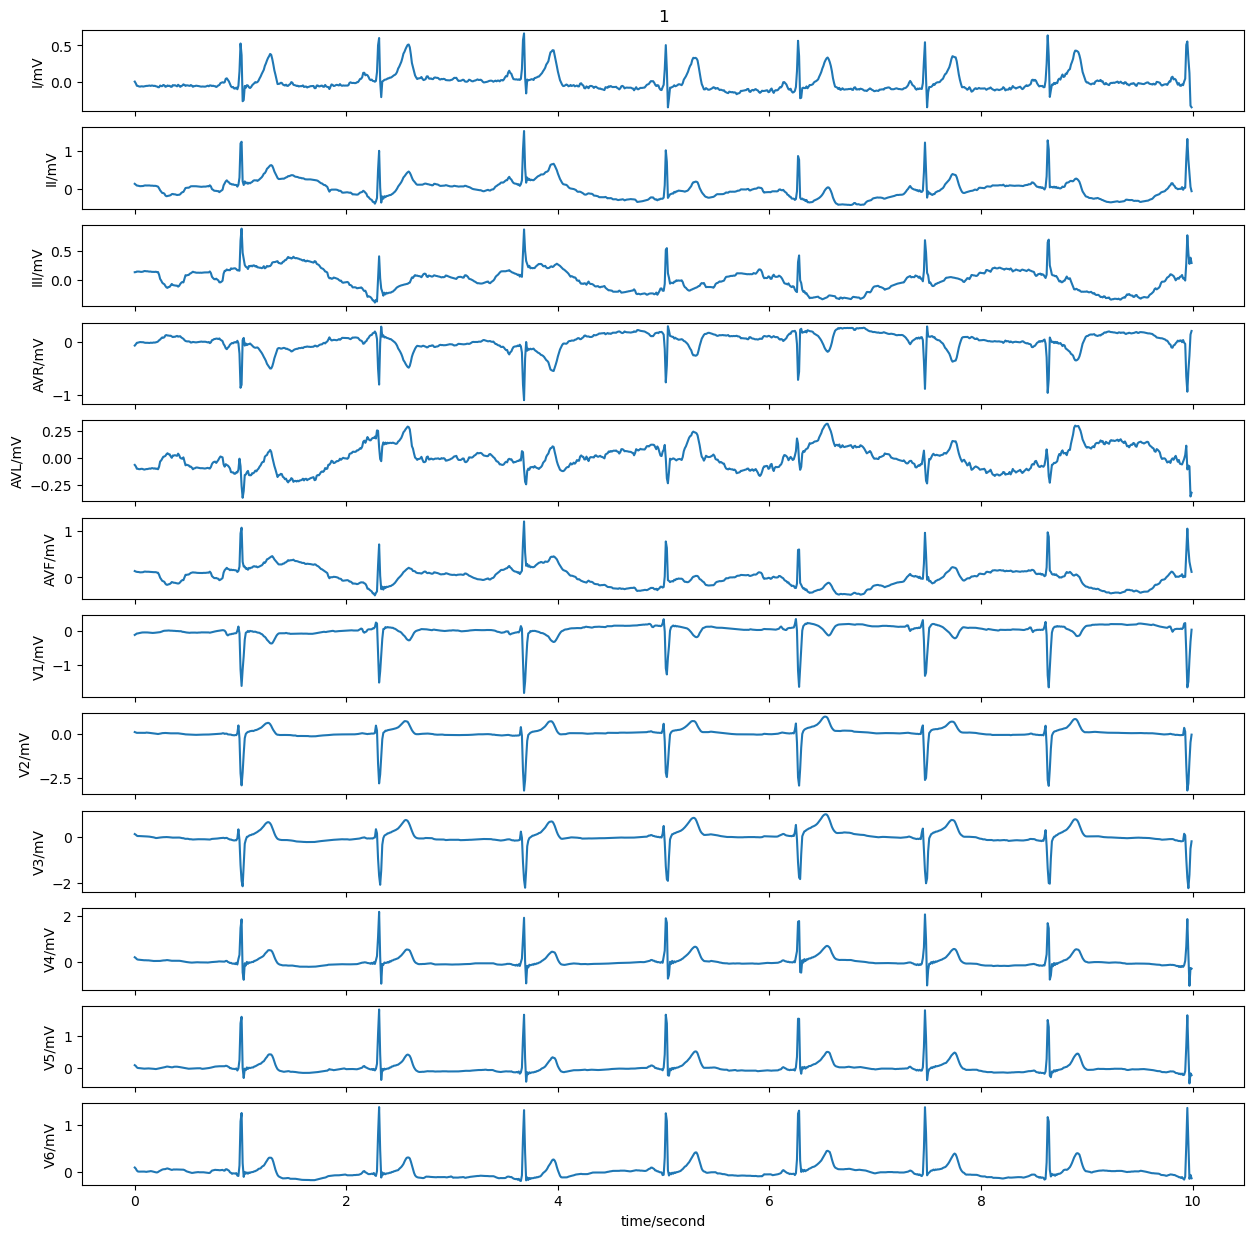

In [3]:
record = wfdb.rdrecord('records100/00000/00002_lr')
wfdb.plot_wfdb(record=record, title="1",figsize = (15, 15))


In [4]:
#"filename_lr" contations the path to each record.
#"scp_codes" has the clasification of normal or not 

ekg_db = pd.read_csv("ptbxl_database.csv")
ekg_db.head(3)


,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr


In [5]:
cleaned_ekg_db = ekg_db[["filename_lr", "scp_codes", "sex", "height", "weight"]].dropna()

cleaned_ekg_db = cleaned_ekg_db.reset_index().drop(columns = "index")
cleaned_ekg_db = cleaned_ekg_db.iloc[:1000]

cleaned_ekg_db.head(3)


,filename_lr,scp_codes,sex,height,weight
0,records100/00000/00101_lr,"{'NORM': 100.0, 'SR': 0.0}",1,172.0,72.0
1,records100/00000/00116_lr,"{'NDT': 100.0, 'SR': 0.0}",1,174.0,74.0
2,records100/00000/00136_lr,"{'NORM': 100.0, 'SR': 0.0}",0,167.0,72.0


In [6]:
for i in range(len(cleaned_ekg_db)):
       cleaned_ekg_db["scp_codes"][i] = cleaned_ekg_db["scp_codes"][i].split("'")[1]
     
cleaned_ekg_db["scp_codes"]

C:\Users\SHANNON\AppData\Local\Temp\ipykernel_11904\3639420955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ekg_db["scp_codes"][i] = cleaned_ekg_db["scp_codes"][i].split("'")[1]
C:\Users\SHANNON\AppData\Local\Temp\ipykernel_11904\3639420955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ekg_db["scp_codes"][i] = cleaned_ekg_db["scp_codes"][i].split("'")[1]
C:\Users\SHANNON\AppData\Local\Temp\ipykernel_11904\3639420955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

0      NORM
1       NDT
2      NORM
3       IMI
4      NORM
       ... 
995    ASMI
996    NORM
997    NORM
998     NDT
999    NORM
Name: scp_codes, Length: 1000, dtype: object

In [7]:
cleaned_ekg_db["healthy"] = 0

for w in range(len(cleaned_ekg_db)):
    if cleaned_ekg_db["scp_codes"][w] == "NORM":
        cleaned_ekg_db["healthy"][w] = 1
    else:
        cleaned_ekg_db["healthy"][w] = 0    

C:\Users\SHANNON\AppData\Local\Temp\ipykernel_11904\2940621730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ekg_db["healthy"][w] = 1
C:\Users\SHANNON\AppData\Local\Temp\ipykernel_11904\2940621730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ekg_db["healthy"][w] = 0
C:\Users\SHANNON\AppData\Local\Temp\ipykernel_11904\2940621730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_ekg_db["healthy"][w]

In [8]:
cleaned_ekg_db

,filename_lr,scp_codes,sex,height,weight,healthy
0,records100/00000/00101_lr,NORM,1,172.0,72.0,1
1,records100/00000/00116_lr,NDT,1,174.0,74.0,0
2,records100/00000/00136_lr,NORM,0,167.0,72.0,1
3,records100/00000/00146_lr,IMI,0,182.0,90.0,0
4,records100/00000/00156_lr,NORM,1,159.0,70.0,1
...,...,...,...,...,...,...
995,records100/01000/01877_lr,ASMI,1,156.0,50.0,0
996,records100/01000/01879_lr,NORM,0,168.0,81.0,1
997,records100/01000/01880_lr,NORM,0,173.0,73.0,1
998,records100/01000/01881_lr,NDT,0,173.0,107.0,0


In [9]:
# # Directory containing the files
# folder_path = '..\EKG DATA'
# # Loop through all files with .hea extension in the folder
# for root, dirs, files in os.walk(folder_path):
#     for file_name in files:
#         # Check if the file has a .hea extension
#         if file_name.endswith('.hea'):
#             # Construct the full path to the file
#             file_path = os.path.join(root, file_name)
#             # Do something with the .hea file
#             print("Processing .hea file:", wfdb.plot_wfdb(record = wfdb.rdrecord(f"records100/00000/{file_name[:8]}"), title = file_name, figsize = (15,15)))
#             # You can perform any action you want with the .hea file here

In [10]:
for t in range(len(cleaned_ekg_db)):
    
    record_ = wfdb.rdrecord(cleaned_ekg_db["filename_lr"][t])
    trial = wfdb.plot_wfdb(record = record_, title = f"{cleaned_ekg_db['filename_lr'][t][17:]},  {cleaned_ekg_db['healthy'][t]}", figsize = (15,15),
                                                  return_fig = True)
    if cleaned_ekg_db["healthy"][t] == 1:
        trial.savefig(f"..\EKG DATA\ekg_norm_png\{cleaned_ekg_db['filename_lr'][t][17:]}")
    else:
        trial.savefig(f"..\EKG DATA\ekg_abnorm_png\{cleaned_ekg_db['filename_lr'][t][17:]}")


c:\Users\SHANNON\anaconda3\Lib\site-packages\wfdb\plot\plot.py:419: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(


Error in callback <function _draw_all_if_interactive at 0x0000023B96402C00> (for post_execute):


KeyboardInterrupt: 

AttributeError: module 'matplotlib' has no attribute 'pyplot'